In [1]:
# ------------------------------
# Data Wrangling and Manipulation
# ------------------------------
import pandas as pd # For handling and manipulating structured data.
import numpy as np # For numerical computations and array operations.
# ------------------------------
# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For advanced stastical visualizations
# ------------------------------
# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder # Converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer # Handles missing values
# ------------------------------
# Dimensionality Reduction & Feature selection
# ------------------------------
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif # Feature selection
# ------------------------------
# Model Selection and Evaluation
# ------------------------------
from sklearn.model_selection import train_test_split # Splits dataset into training and test sets
from sklearn.model_selection import cross_validate # Performs cross-validation
from sklearn.model_selection import KFold # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning using grid search
# ------------------------------
# Performance Metrics
# ------------------------------
from sklearn.metrics import accuracy_score # Evaluates model accuracy
from sklearn.metrics import confusion_matrix # Computes confusion matrix
from sklearn.metrics import classification_report # Precision, recall, F1-score summary
from sklearn.metrics import precision_score # Precision metric
from sklearn.metrics import recall_score # Recall metric
from sklearn.metrics import roc_auc_score # AUC-ROC score for evaluating classifiers
from sklearn import metrics # Collection of evaluation metrics
# ------------------------------
# Handling Imbalaced Datasets
# ------------------------------
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique (for handling class imbalance)
from sklearn.utils import class_weight # Assigns weights to imbalanced classes
# ------------------------------
# Machine Learning Algorithms - Classification

# ------------------------------
# Utility Fuctions
# ------------------------------
from sklearn.pipeline import make_pipeline # Creates machines learning pipelines
from sklearn.datasets import make_classification # Generates symthetic classification datasets
from sklearn import model_selection # Various model selection utilities
from sklearn import svm # Support Vector Machines module
from sklearn import tree # Decision tree-related utilities

In [2]:
from sklearn.datasets import fetch_openml
data = fetch_openml("adult", version=2, as_frame=True)
df=data.frame
df


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.describe()



,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.duplicated().sum()

52

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

age                  0
workclass         2795
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2805
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
class                0
dtype: int64

In [9]:
#Fill NaN values with the mode of each column
df.fillna(df.mode().iloc[0],inplace=True)
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48790 non-null  int64   
 1   workclass       48790 non-null  category
 2   fnlwgt          48790 non-null  int64   
 3   education       48790 non-null  category
 4   education-num   48790 non-null  int64   
 5   marital-status  48790 non-null  category
 6   occupation      48790 non-null  category
 7   relationship    48790 non-null  category
 8   race            48790 non-null  category
 9   sex             48790 non-null  category
 10  capital-gain    48790 non-null  int64   
 11  capital-loss    48790 non-null  int64   
 12  hours-per-week  48790 non-null  int64   
 13  native-country  48790 non-null  category
 14  class           48790 non-null  category
dtypes: category(9), int64(6)
memory usage: 3.0 MB


In [11]:
df=pd.get_dummies(df,columns=['workclass'],prefix=['workclass'],drop_first=False,dtype=int)

In [12]:
df=pd.get_dummies(df,columns=['marital-status'],prefix=['marital-status'],drop_first=False,dtype=int)

In [13]:
df=pd.get_dummies(df,columns=['occupation'],prefix=['occupation'],drop_first=False,dtype=int)

In [14]:
df=pd.get_dummies(df,columns=['relationship'],prefix=['relationship'],drop_first=False,dtype=int)

In [15]:
df=pd.get_dummies(df,columns=['race'],prefix=['race'],drop_first=False,dtype=int)

In [16]:
df=df.drop(["native-country"],axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 49 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   age                                   48790 non-null  int64   
 1   fnlwgt                                48790 non-null  int64   
 2   education                             48790 non-null  category
 3   education-num                         48790 non-null  int64   
 4   sex                                   48790 non-null  category
 5   capital-gain                          48790 non-null  int64   
 6   capital-loss                          48790 non-null  int64   
 7   hours-per-week                        48790 non-null  int64   
 8   class                                 48790 non-null  category
 9   workclass_Federal-gov                 48790 non-null  int32   
 10  workclass_Local-gov                   48790 non-null  int32   
 11  workcla

In [18]:
df['education'].value_counts()

education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64

In [19]:
edu_order = {
    'Preschool': 0, '1st-4th': 1, '5th-6th': 2, '7th-8th': 3, '9th': 4, '10th': 5, '11th': 6,
    '12th': 7, 'HS-grad': 8, 'Some-college': 9, 'Assoc-voc': 10, 'Assoc-acdm': 11,
    'Bachelors': 12, 'Masters': 13, 'Prof-school': 14, 'Doctorate': 15
}
df['education'] = df['education'].str.strip().map(edu_order)

In [20]:

sex_order = {'Male':0,'Female':1}
df['sex'] = df['sex'].str.strip().map(sex_order)

In [21]:

df['class'] = df['class'].str.strip().map({'<=50K': 0, '>50K': 1})


In [22]:
skewness=df.skew()

#sort the skewness values in ascending order
sorted_skewness=skewness.sort_values(ascending=True)

#print the sorted skewness values
print(sorted_skewness)

race_White                              -2.016189
workclass_Private                       -1.162646
education                               -0.314229
education-num                           -0.314229
marital-status_Married-civ-spouse        0.166929
hours-per-week                           0.239652
relationship_Husband                     0.392000
age                                      0.556582
sex                                      0.715690
marital-status_Never-married             0.724943
relationship_Not-in-family               1.110009
class                                    1.221366
fnlwgt                                   1.439698
occupation_Prof-specialty                1.632382
relationship_Own-child                   1.905223
marital-status_Divorced                  2.125208
occupation_Craft-repair                  2.266936
occupation_Exec-managerial               2.272611
occupation_Adm-clerical                  2.415233
occupation_Sales                         2.448824


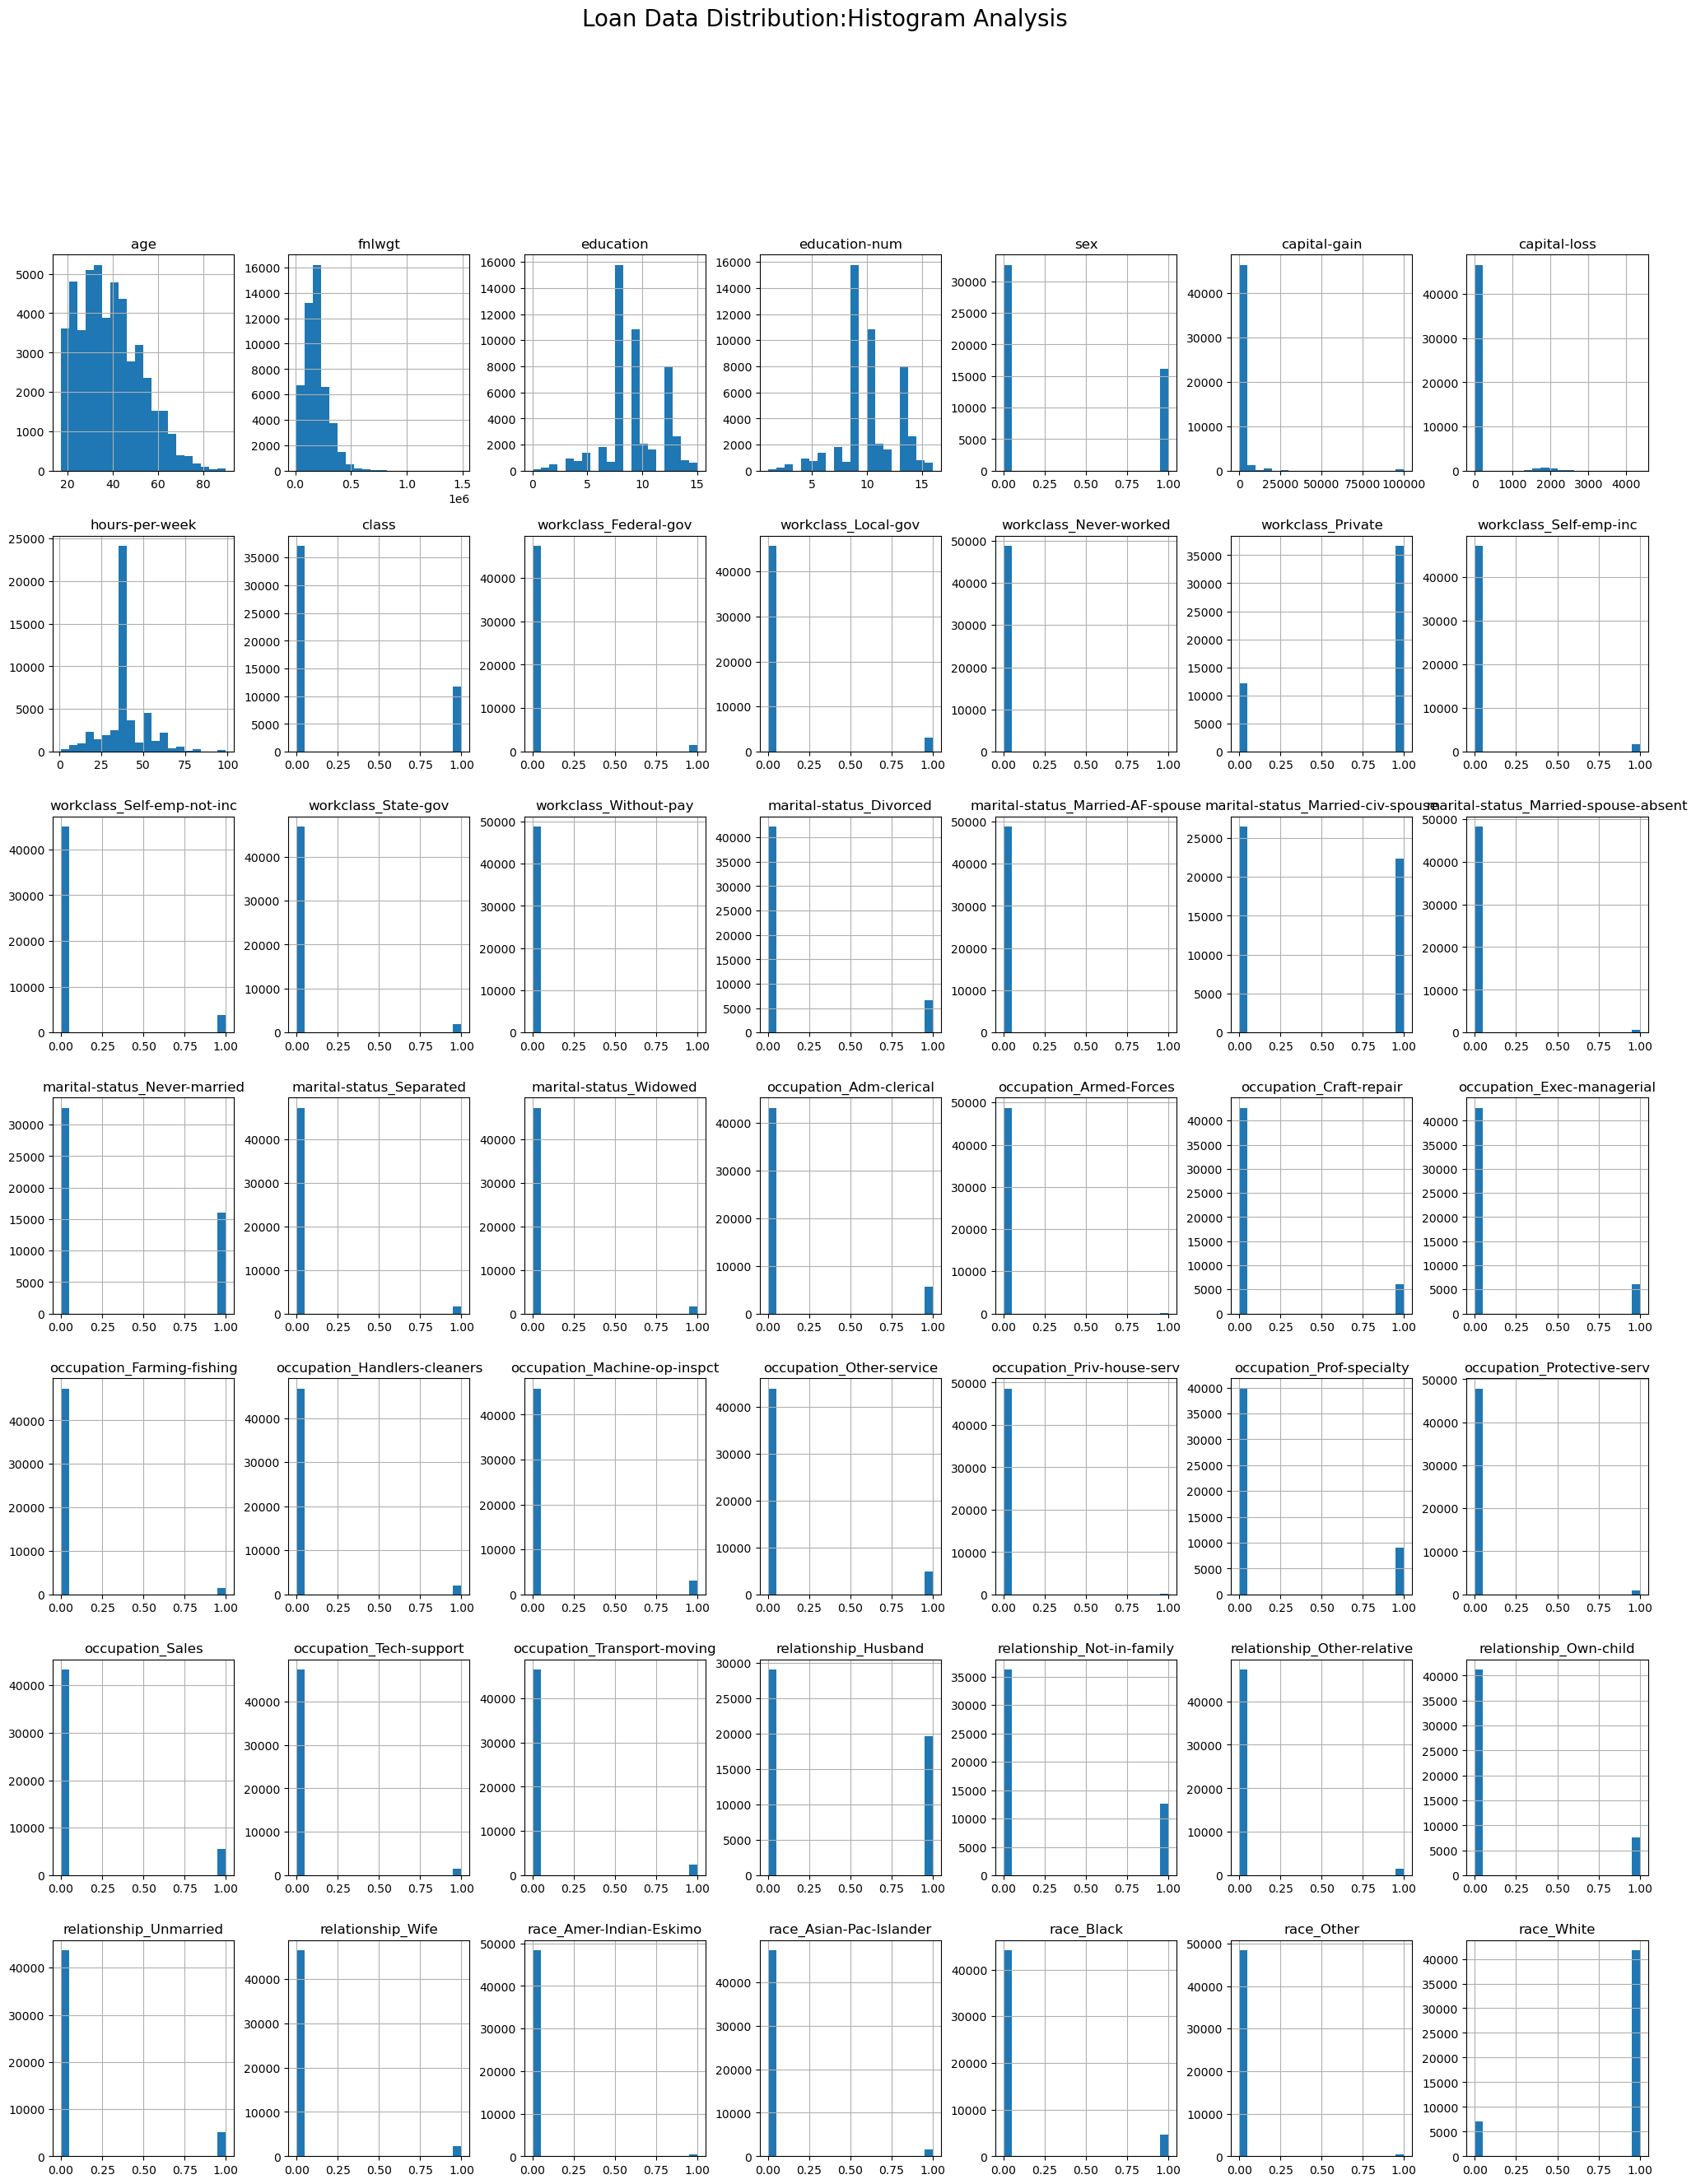

In [23]:
df.hist(bins=20, figsize=(25,30))
plt.suptitle("Loan Data Distribution:Histogram Analysis", fontsize=20)
plt.show()

In [24]:
df["age"]=np.log1p(df["age"])

In [25]:
correlation_matrix=df.corr()
#set the correlation threshold
threshold=-0.5
#find pairs of features with high correlation
highly_correlated_pairs=[]
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    if abs(correlation_matrix.iloc[i,j])>threshold:
      highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
print(highly_correlated_pairs)

[('fnlwgt', 'age'), ('education', 'age'), ('education', 'fnlwgt'), ('education-num', 'age'), ('education-num', 'fnlwgt'), ('education-num', 'education'), ('sex', 'age'), ('sex', 'fnlwgt'), ('sex', 'education'), ('sex', 'education-num'), ('capital-gain', 'age'), ('capital-gain', 'fnlwgt'), ('capital-gain', 'education'), ('capital-gain', 'education-num'), ('capital-gain', 'sex'), ('capital-loss', 'age'), ('capital-loss', 'fnlwgt'), ('capital-loss', 'education'), ('capital-loss', 'education-num'), ('capital-loss', 'sex'), ('capital-loss', 'capital-gain'), ('hours-per-week', 'age'), ('hours-per-week', 'fnlwgt'), ('hours-per-week', 'education'), ('hours-per-week', 'education-num'), ('hours-per-week', 'sex'), ('hours-per-week', 'capital-gain'), ('hours-per-week', 'capital-loss'), ('class', 'age'), ('class', 'fnlwgt'), ('class', 'education'), ('class', 'education-num'), ('class', 'sex'), ('class', 'capital-gain'), ('class', 'capital-loss'), ('class', 'hours-per-week'), ('workclass_Federal-gov

<Axes: >

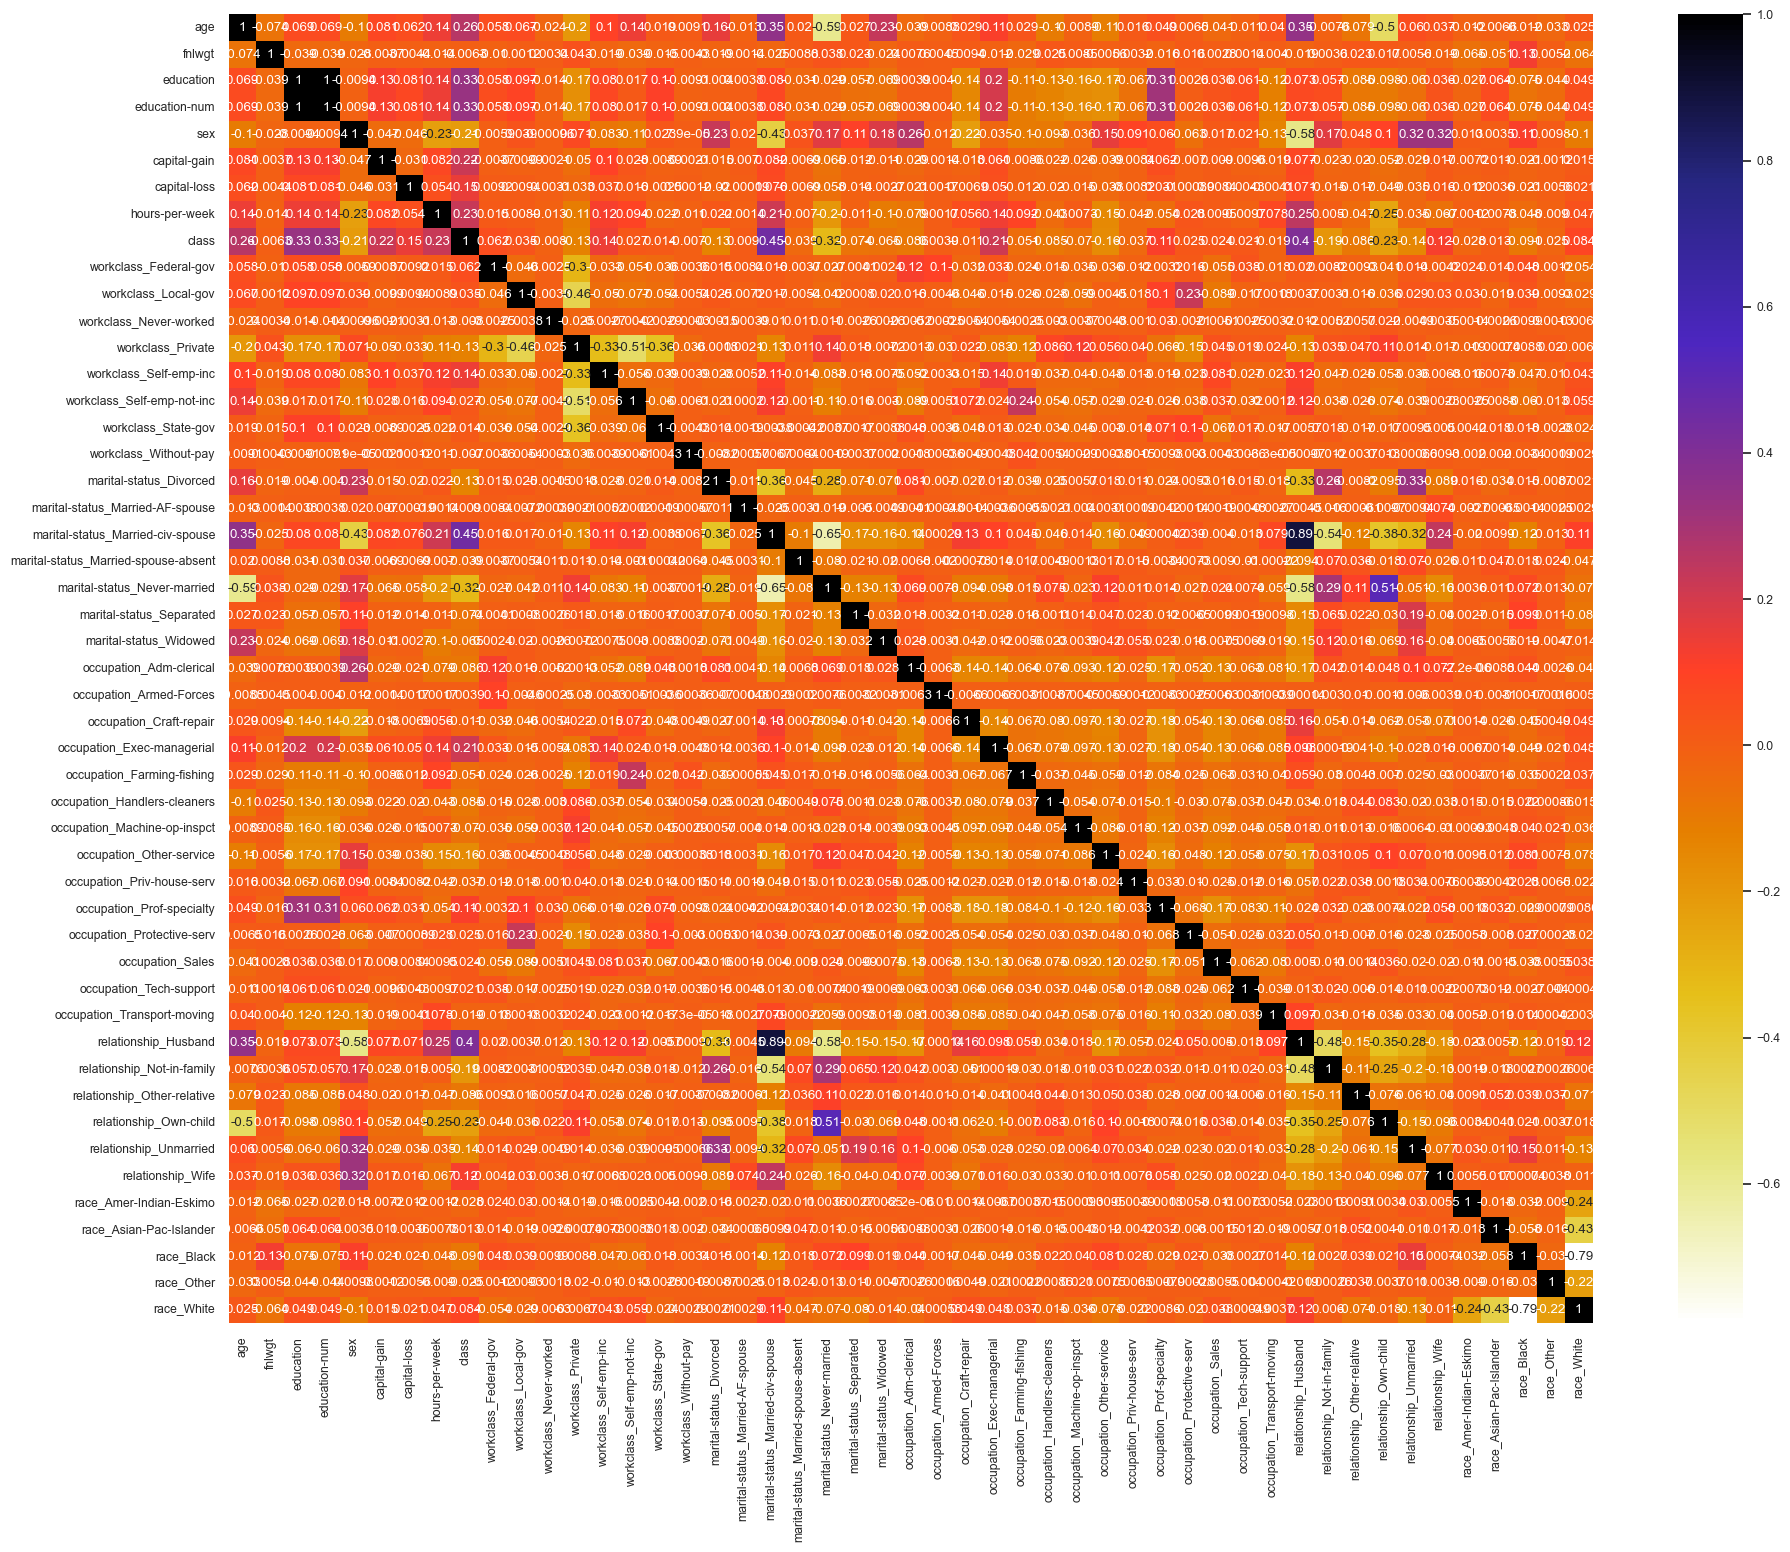

In [26]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [27]:
df.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'class', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupat

In [28]:
columns_to_drop = [
    "fnlwgt", "workclass_Federal-gov", "workclass_Local-gov", "workclass_Private",
    "workclass_Never-worked", "workclass_Without-pay", "workclass_Self-emp-inc",
    "workclass_State-gov", "workclass_Self-emp-not-inc", "marital-status_Married-AF-spouse",
    "marital-status_Married-civ-spouse", "marital-status_Married-spouse-absent",
    "marital-status_Widowed", "marital-status_Separated", "marital-status_Never-married",
    "marital-status_Divorced", "occupation_Prof-specialty", "occupation_Adm-clerical",
    "occupation_Armed-Forces", "occupation_Craft-repair", "occupation_Exec-managerial",
    "occupation_Farming-fishing", "occupation_Handlers-cleaners", "occupation_Priv-house-serv",
    "occupation_Protective-serv", "occupation_Transport-moving", "occupation_Tech-support",
    "occupation_Sales", "occupation_Other-service", "occupation_Machine-op-inspct",
    "race_Amer-Indian-Eskimo", "race_Asian-Pac-Islander", "race_Black", "race_Other",
    "race_White", "relationship_Not-in-family", "relationship_Own-child",
    "relationship_Other-relative", "relationship_Unmarried", "sex"
]

df = df.drop(columns=columns_to_drop)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   48790 non-null  float64
 1   education             48790 non-null  int64  
 2   education-num         48790 non-null  int64  
 3   capital-gain          48790 non-null  int64  
 4   capital-loss          48790 non-null  int64  
 5   hours-per-week        48790 non-null  int64  
 6   class                 48790 non-null  int64  
 7   relationship_Husband  48790 non-null  int32  
 8   relationship_Wife     48790 non-null  int32  
dtypes: float64(1), int32(2), int64(6)
memory usage: 3.4 MB


In [30]:
df.columns

Index(['age', 'education', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'class', 'relationship_Husband', 'relationship_Wife'],
      dtype='object')

In [31]:
df

,age,education,education-num,capital-gain,capital-loss,hours-per-week,class,relationship_Husband,relationship_Wife
0,3.258097,6,7,0,0,40,0,0,0
1,3.663562,8,9,0,0,50,0,1,0
2,3.367296,11,12,0,0,40,1,1,0
3,3.806662,9,10,7688,0,40,1,1,0
4,2.944439,9,10,0,0,30,0,0,0
...,...,...,...,...,...,...,...,...,...
48837,3.332205,11,12,0,0,38,0,0,1
48838,3.713572,8,9,0,0,40,1,1,0
48839,4.077537,8,9,0,0,40,0,0,0
48840,3.135494,8,9,0,0,20,0,0,0


In [32]:
x=df.drop(["class"],axis=1)
y=df["class"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("shape of  training features:",x_train.shape)
print("shape of training target:",y_train.shape)
print("shape of testing features:",x_test.shape)
print("shape of testing target:",y_test.shape)

shape of  training features: (39032, 8)
shape of training target: (39032,)
shape of testing features: (9758, 8)
shape of testing target: (9758,)


In [33]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [34]:
y_test

3169     0
25270    1
33668    1
29925    1
11098    0
        ..
40813    0
40607    0
25417    0
38914    0
3720     0
Name: class, Length: 9758, dtype: int64

In [35]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8283459725353556

In [36]:
x_train

,age,education,education-num,capital-gain,capital-loss,hours-per-week,relationship_Husband,relationship_Wife
6356,4.025352,8,9,0,0,40,0,0
6522,3.044522,9,10,0,0,40,0,0
9289,3.555348,3,4,0,0,40,0,1
14861,3.871201,13,14,0,0,40,0,0
43274,3.637586,10,11,0,0,42,1,0
...,...,...,...,...,...,...,...,...
11287,4.007333,10,11,0,0,16,1,0
44775,3.737670,4,5,0,0,55,1,0
38190,3.135494,9,10,0,0,40,0,0
860,3.850148,10,11,0,0,40,0,0


# prediction

In [37]:

ndata={
    "age":19,"education":"11th","education-num":16,"capital-gain":45000,"capital-loss":2100,"hours-per-week":18,"relationship_Husband":0,"relationship_Wife":1
}
newdf=pd.DataFrame([ndata])
newdf

,age,education,education-num,capital-gain,capital-loss,hours-per-week,relationship_Husband,relationship_Wife
0,19,11th,16,45000,2100,18,0,1


In [38]:
newdf["age"]=np.log1p(newdf["age"])
edu_order = {
    'Preschool': 0, '1st-4th': 1, '5th-6th': 2, '7th-8th': 3, '9th': 4, '10th': 5, '11th': 6,
    '12th': 7, 'HS-grad': 8, 'Some-college': 9, 'Assoc-voc': 10, 'Assoc-acdm': 11,
    'Bachelors': 12, 'Masters': 13, 'Prof-school': 14, 'Doctorate': 15
}
newdf['education'] = newdf['education'].str.strip().map(edu_order)

In [39]:
predict=model.predict(newdf)

In [40]:
if predict==1:
    result="above 50k"
else:
    result="below 50k"
result
    
    
  


'above 50k'

In [41]:
#from sklearn.ensemble import GradientBoostingClassifier


In [44]:
import pickle
from sklearn.ensemble import GradientBoostingClassifier

#save the classification model
c_model=GradientBoostingClassifier(random_state=0,learning_rate=0.45)
c_model.fit(x_train,y_train.values.ravel())
with open("classification_model.pkl","wb")as file:
   pickle.dump(c_model,file) 

In [ ]:
x_train.columns

Index(['age', 'education', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'relationship_Husband', 'relationship_Wife'],
      dtype='object')

In [ ]:
import sklearn
print(sklearn.__version__)

1.4.2
